In [283]:
import pandas as pd
import numpy as np
from sklearn import datasets, preprocessing, decomposition, model_selection
from sklearn import ensemble, naive_bayes, metrics
import matplotlib.pyplot as pyplot
from mlxtend import plotting

In [284]:
SBD = pd.read_csv('/content/drive/MyDrive/中興大學-資料探勘/openpowerlifting.csv',usecols=['Equipment','Wilks','McCulloch','Glossbrenner','IPFPoints'])
SBD_n = SBD.copy()

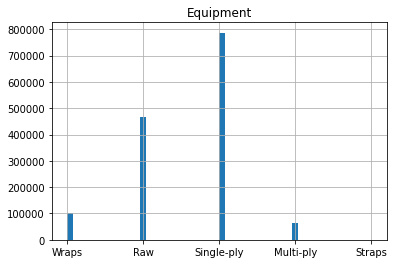

In [285]:
SBD["Equipment"].hist(bins = 50)
pyplot.title("Equipment")
pyplot.show()

In [299]:
SBD = SBD.loc[:2000,:].dropna()
SBD

,Equipment,Wilks,McCulloch,Glossbrenner,IPFPoints
0,3,324.16,324.16,286.42,511.15
1,3,378.07,378.07,334.16,595.65
2,1,38.56,38.56,34.12,313.97
3,3,345.61,345.61,305.37,547.04
4,3,321.25,338.91,274.56,550.08
...,...,...,...,...,...
1996,3,366.44,373.77,351.20,521.26
1997,3,369.38,452.49,353.85,524.53
1998,3,375.11,375.11,359.13,532.07
1999,3,435.31,435.31,415.12,615.43


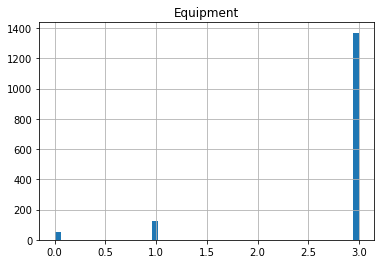

In [300]:
SBD["Equipment"].hist(bins = 50)
pyplot.title("Equipment")
pyplot.show()

In [364]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
SBD.Equipment=le.fit_transform(SBD.Equipment)
SBD.astype({'Equipment': 'int64'})
SBD.dtypes

Equipment         int64
Wilks           float64
McCulloch       float64
Glossbrenner    float64
IPFPoints       float64
dtype: object

In [365]:
SBD.Equipment

0       3
1       3
2       1
3       3
4       3
       ..
1996    3
1997    3
1998    3
1999    3
2000    3
Name: Equipment, Length: 1549, dtype: int64

In [366]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(SBD.values[:,1:3],SBD['Equipment'].values,test_size=0.25,random_state=100)
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(SBD)
Xpca_train,Xpca_test,ypca_train,ypca_test = model_selection.train_test_split(X_pca,SBD['Equipment'].values,test_size=0.25,random_state=100)


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


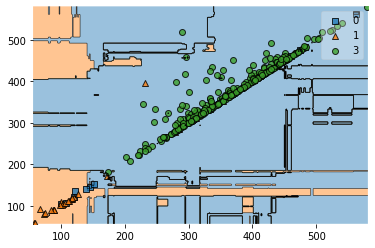

In [367]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train,y_train)
plotting.plot_decision_regions(X_test,y_test,clf=rfc)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


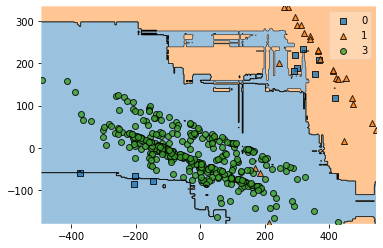

In [304]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(Xpca_train,ypca_train)
plotting.plot_decision_regions(Xpca_test,ypca_test,clf=rfc)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


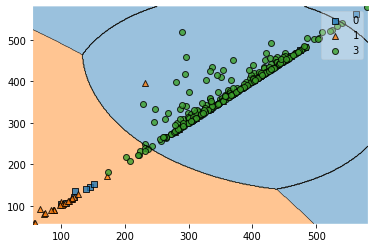

In [305]:
gnb = naive_bayes.GaussianNB()
gnb.fit(X_train,y_train)
plotting.plot_decision_regions(X_test,y_test,clf=gnb)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


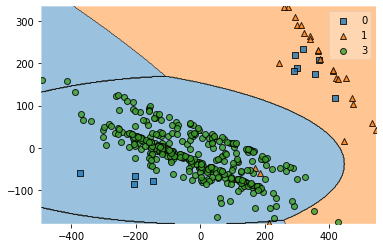

In [306]:
gnb = naive_bayes.GaussianNB()
gnb.fit(Xpca_train,ypca_train)
plotting.plot_decision_regions(Xpca_test,ypca_test,clf=gnb)

In [370]:
arr = np.array(SBD)
arr = np.array([x for x in arr if x[0] !=3])
arr[:,0] = arr[:,0]
SBD_data = arr[:,1:3]
SBD_Equipment = arr[:,0].astype(np.integer)
X_train,X_test,y_train,y_test = model_selection.train_test_split(SBD_data,SBD_Equipment,test_size=0.25,random_state=100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  """


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


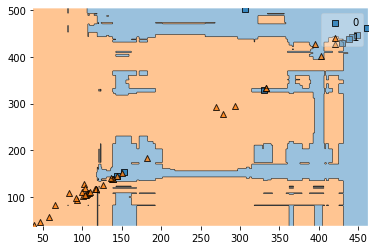

In [371]:
rfc.fit(X_train,y_train)
plotting.plot_decision_regions(X_test,y_test,clf=rfc)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


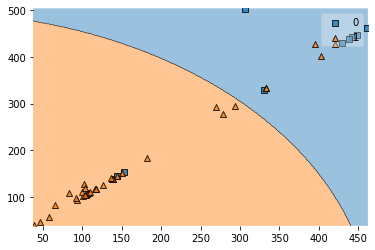

In [372]:
gnb.fit(X_train,y_train)
plotting.plot_decision_regions(X_test,y_test,clf=gnb)



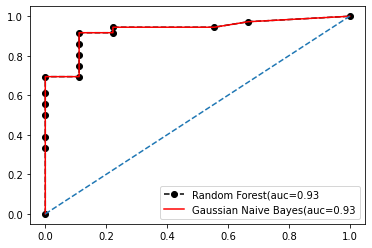

In [382]:
rfc_posi = rfc.predict_proba(X_test)[:,1]
gnb_posi = rfc.predict_proba(X_test)[:,1]

rfc_fp,rfc_tp,rfc_ts = metrics.roc_curve(y_test,rfc_posi)
gnb_fp,gnb_tp,gnb_ts = metrics.roc_curve(y_test,gnb_posi)

auc_rfc = metrics.auc(rfc_fp,rfc_tp)
auc_gnb = metrics.auc(rfc_fp,rfc_tp)
pyplot.plot(rfc_fp,rfc_tp,color='black',marker='o',linestyle="--",label="Random Forest(auc=%0.2f" %auc_rfc)
pyplot.plot(gnb_fp,gnb_tp,color='red',label="Gaussian Naive Bayes(auc=%0.2f" %auc_gnb)
pyplot.plot([0,1],[0,1],linestyle="--")
pyplot.legend(loc=4)